#### Optimizer

[module for LARS](https://github.com/kakaobrain/torchlars)

or copy-paste from somewhere else

In [1]:
# ! pip install torchlars
# from torchlars import LARS
# optimizer = LARS(optim.SGD(model.parameters(), lr=0.1))

In [2]:
# # Example

# from torchlars import LARS

# base_optimizer = optim.SGD(model.parameters(), lr=0.1)
# optimizer = LARS(optimizer=base_optimizer, eps=1e-8, trust_coef=0.001)

# output = model(input)
# loss = loss_fn(output, target)
# loss.backward()

# optimizer.step()

## Training

In [3]:
import torch 
device = torch.device('cuda:2' if torch.cuda.is_available() else 'cpu')

importing Jupyter notebook from model.ipynb
importing Jupyter notebook from data_set_loader.ipynb


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 224, 224, 3])
torch.Size([224, 224, 3])


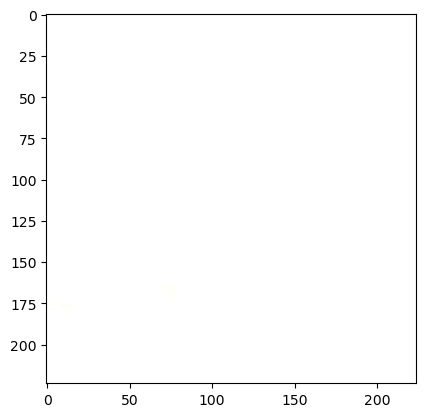

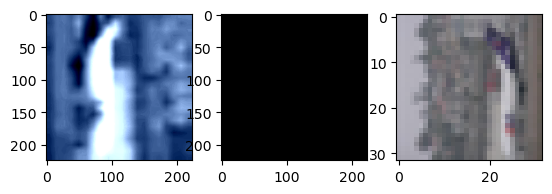

In [4]:
# ! pip install import-ipynb
import import_ipynb
from model import *
from data_set_loader import *

import torch.optim 

### Training Loop

In [5]:
def model_train(data_loader, model, criterion, optimizer, epochs=10): 

    for epoch in range(epochs): 
        train_loss = 0
        data_size = 0
        print(f"Epoch {epoch}/{epochs}\t")

        model.train()

        for step, (x1, x2, y) in enumerate(data_loader): 

            x1 = x1.to(device)
            x2 = x2.to(device)

            data_size += y.shape[0]

            optimizer.zero_grad()
            z, labels = model(x1, x2)
            loss = criterion(z, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()*y.shape[0]
            if step % 25 == 0: 
                print(f"Step {step}/625x \t Loss: {train_loss/data_size}")


In [6]:
batch_size = 16
train_data = ContrastiveCIFAR10()
# val_data = ContrastiveCIFAR10(mode = 'val')
len(train_data)

40000

In [7]:
train_dl = DataLoader(train_data, batch_size)
# val_dl = DataLoader(val_data, batch_size)

In [8]:
model = SimCLR().to(device)
criterion = NTXentLoss(temperature=0.1).cuda()
optimizer = torch.optim.Adam(model.parameters())

model_train(train_dl, model, criterion, optimizer, epochs=2)

Epoch 0/2	


OutOfMemoryError: CUDA out of memory. Tried to allocate 16.00 MiB. GPU  has a total capacity of 10.75 GiB of which 5.56 MiB is free. Including non-PyTorch memory, this process has 10.74 GiB memory in use. Of the allocated memory 10.36 GiB is allocated by PyTorch, and 180.16 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)